# Mod 4 Project 

For this project,  The firm has asked you what seems like a simple question:¶
what are the top 5 best zipcodes for us to invest in?
This may seem like a simple question at first glance, but there's more than a little ambiguity here that you'll have to think through in order to provide a solid recommendation. Should your recommendation be focused on profit margins only? What about risk? What sort of time horizon are you predicting against? Your recommendation will need to detail your rationale and answer any sort of lingering questions like these in order to demonstrate how you define "best".

2012 will probably be considered the year that a sinking housing market finally hit bottom and began to rise again. Home prices, home sales and new home construction all substantially increased amid shrinking inventory and record-low mortgage rates.

This model is for suggesting the best 5 zipcodes to invest for a Real Estate Investment Company. Conditions to be set by the company is listed below. 

1- Company would like to invest in the Texas
2- The range of the investment is not defined so, it could be any amount
3- Company would like to make investment for 3 years
4- Company asks for the best percentage of the investment as







# Step 1: Load the Data 

In [127]:
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')
warnings.filterwarnings("ignore") #ignore the warnings to avoid a lot of noise from running the procedure

In [333]:
df=pd.read_csv('zillow_data.csv')
df.head(2)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800


In [334]:
df.shape


(14723, 272)

In [335]:
df.isna().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [336]:
df.isna().sum().sum()

157934

In [131]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object


# Step 2: Feature Engineering


### Dealing with Null values

In [325]:
df_full=df # keep the original dataframe as it is (df).

df_full.Metro.fillna(df_full.City, inplace=True) # fill missing metro with city iname
df_full=df_full.bfill(axis='columns') # use .bfill() method to fill missing price data, 
#.bfill() converted datatype to object so, it will be handled later
df_full.index=df_full.RegionName
df_full.drop('RegionName', axis=1, inplace=True)


### Filtering for Chosen Zipcodes 

In [295]:
def select_state_top10 (df, state ):
    df_state=df[df['State']==state] #filter state
    df2 = df_state.iloc[:, 6:]  #select only the price data
    df2['increase'] =(df2['2018-04'] - df2['1996-04'])  #calculate price change and the percentage of the increase
    df2['increase_rate'] = df2['increase']/df2['1996-04'] 
    df2.sort_values(by= ['increase_rate'], ascending=False, inplace=True) #sort by rate and slice top 10
    df10= df2.iloc[:10, :].astype(int)  #convert datatype to int
    df2.sort_values(by= ['increase'], ascending=False, inplace=True) #sort by increase and slice top 10
    df10_growth = df2.iloc[:10, :].astype(int) 
    return df10, df10_growth

In [338]:
top10_rate, top10_growth= select_state_top10 (df_full, 'TX' )
#top10_rate.head(3)

In [339]:
def convert_to_ts (df):
    ts=df.drop(['increase','increase_rate'], axis=1)  #drop columns other than price 
    ts=ts.T     # Transpose the dataframe
    ts.index=pd.to_datetime(ts.index)   #change index type to timestamp
    ts=ts.astype(int)  
    return ts

In [340]:
ts_top10_rate=convert_to_ts (top10_rate)
ts_top10_growth=convert_to_ts (top10_growth)

# DO NOT  TOUCH ABOVE CODE!

# Step 3: EDA and Visualization

In [376]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [377]:
plt.gcf().autofmt_xdate()


<Figure size 432x288 with 0 Axes>

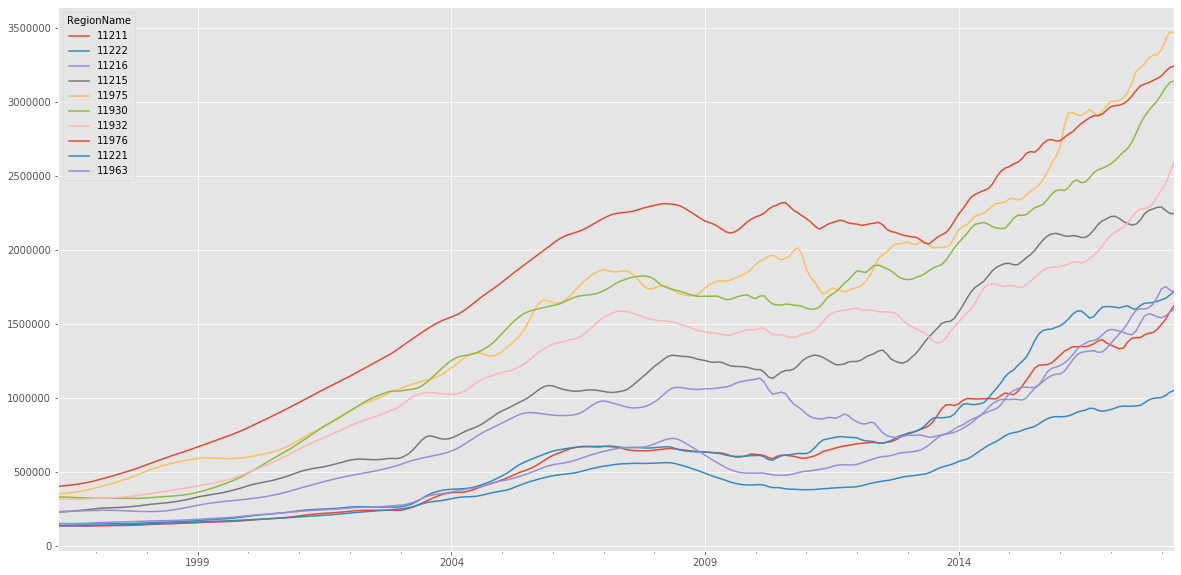

In [329]:
ts_top10_rate.plot(figsize = (20,10), subplots=False, legend=True)
plt.show()

In [299]:
#df_yr=dr.resample('AS').mean()
#|r = melt_data(dr)['value']
#tre = tr.resample('AS').mean()

In [300]:
top10_rate.astype(int).describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,increase,increase_rate
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,240930.000000,241560.000000,242240.00000,242960.000000,243870.000000,244990.000000,246340.000000,248030.000000,250260.000000,252700.00000,...,2.098530e+06,2.116060e+06,2.129740e+06,2.146960e+06,2.171020e+06,2.196780e+06,2.222520e+06,2.239340e+06,1.998410e+06,8.000000
std,100454.943466,101211.485953,102044.53494,102927.204049,103883.760361,104971.831671,106256.818866,107712.044617,109544.219382,111675.08426,...,7.877256e+05,7.952253e+05,8.013087e+05,8.036526e+05,8.111692e+05,8.258801e+05,8.339577e+05,8.300961e+05,7.365452e+05,1.632993
min,133200.000000,132900.000000,132500.00000,132200.000000,131800.000000,131600.000000,131500.000000,131800.000000,132400.000000,133100.00000,...,9.653000e+05,9.847000e+05,9.950000e+05,9.981000e+05,1.000900e+06,1.015400e+06,1.037300e+06,1.048700e+06,9.150000e+05,6.000000
25%,146875.000000,147050.000000,147275.00000,146875.000000,146600.000000,146525.000000,146600.000000,147025.000000,147750.000000,148475.00000,...,1.564625e+06,1.577775e+06,1.577825e+06,1.572075e+06,1.570600e+06,1.583400e+06,1.609925e+06,1.646500e+06,1.486075e+06,7.000000
50%,228000.000000,229150.000000,230450.00000,231900.000000,233600.000000,235500.000000,237450.000000,239500.000000,241850.000000,244050.00000,...,1.941550e+06,1.953250e+06,1.959950e+06,1.983450e+06,2.012750e+06,2.007550e+06,1.986100e+06,1.982500e+06,1.795050e+06,8.000000
75%,324600.000000,324175.000000,323550.00000,322600.000000,321550.000000,320475.000000,319550.000000,318875.000000,318950.000000,319575.00000,...,2.747575e+06,2.778525e+06,2.810625e+06,2.846550e+06,2.890025e+06,2.936350e+06,2.979700e+06,3.003850e+06,2.679250e+06,8.750000
max,400000.000000,402700.000000,405700.00000,408900.000000,412600.000000,416700.000000,421400.000000,426600.000000,433100.000000,440500.00000,...,3.256800e+06,3.298600e+06,3.315100e+06,3.317200e+06,3.353000e+06,3.425000e+06,3.473300e+06,3.467800e+06,3.118300e+06,11.000000


In [301]:
growth_top10.describe()

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,increase,increase_rate
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000,10.000000
mean,494550.000000,495060.000000,495730.000000,496600.000000,497750.000000,499210.000000,501010.000000,503100.000000,505310.000000,507560.000000,...,8.729700e+05,8.769700e+05,8.775000e+05,8.768600e+05,8.783200e+05,8.833000e+05,8.901700e+05,8.941800e+05,290280.000000,0.619267
std,141740.500368,142556.797258,143363.408085,144216.326707,145198.471449,146253.094554,147397.040902,148537.881438,149785.308952,151038.061428,...,2.369615e+05,2.376762e+05,2.383121e+05,2.403693e+05,2.426497e+05,2.442950e+05,2.441631e+05,2.426215e+05,61419.283979,0.167139
min,248700.000000,248900.000000,249200.000000,249600.000000,250100.000000,250700.000000,251200.000000,251600.000000,251800.000000,251800.000000,...,4.913000e+05,4.931000e+05,4.935000e+05,4.931000e+05,4.937000e+05,5.011000e+05,5.147000e+05,5.266000e+05,220100.000000,0.413645
25%,374450.000000,373675.000000,373250.000000,373125.000000,373400.000000,374175.000000,375550.000000,377525.000000,379825.000000,382550.000000,...,7.130250e+05,7.129500e+05,7.081000e+05,7.038000e+05,7.058000e+05,7.094500e+05,7.127000e+05,7.150500e+05,230325.000000,0.540251
50%,526600.000000,530050.000000,533650.000000,537200.000000,540650.000000,543700.000000,546250.000000,548100.000000,549350.000000,549550.000000,...,8.793000e+05,8.854000e+05,8.917000e+05,8.928500e+05,8.942500e+05,8.986500e+05,9.029000e+05,9.020000e+05,301000.000000,0.588955
75%,626450.000000,625600.000000,625000.000000,624925.000000,628525.000000,627625.000000,627650.000000,628650.000000,630150.000000,632225.000000,...,1.017400e+06,1.020075e+06,1.023100e+06,1.026225e+06,1.028425e+06,1.034100e+06,1.044400e+06,1.051850e+06,321850.000000,0.641182
max,640100.000000,639000.000000,640600.000000,641900.000000,643200.000000,645100.000000,647700.000000,655100.000000,662200.000000,668800.000000,...,1.240800e+06,1.246400e+06,1.245700e+06,1.245900e+06,1.250200e+06,1.258300e+06,1.265800e+06,1.268600e+06,380000.000000,0.906250


In [303]:
top10_rate.describe()['2018-04']['mean']
            

2239340.0

In [304]:
top10_growth.describe()['2018-04']['mean']



6470280.0

I wanted to compare the best growth amount and the best growth rate. According to this data, 



In [ ]:
dfs=slice_time_data(df)
dfs.sort_index(axis=0, inplace=True)
dfs

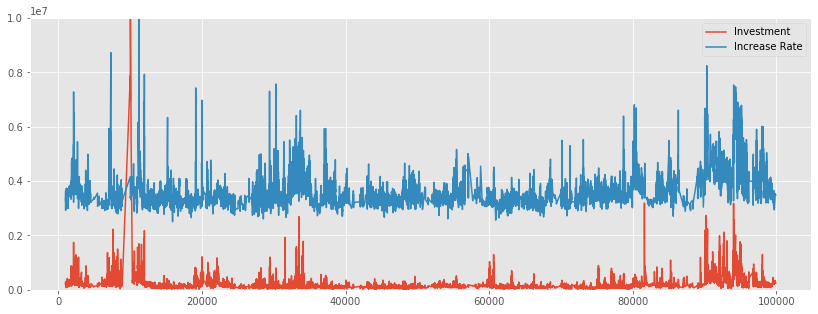

In [370]:
plt.figure(figsize=(14,5))
plt.plot(dfs.index, dfs['2012-04'], label='Investment')
plt.ylim(0,10000000)
#plt.show()
#plt.figure(figsize=(14,5))
plt.plot(dfs.index, dfs.increase_rate*1000000+3000000, label="Increase Rate")
plt.legend()



In [371]:
print("Average investment belove 500K ", dfs[dfs['2018-04']<500000]['2018-04'].mean())
print("Growth rate for the past 12 years", dfs[dfs['2018-04']<500000]['increase_rate'].mean())

Average investment belove 500K  205096.53272101033
Growth rate for the past 12 years 0.543611401469562


In [372]:
print("Average investment above 500K ", dfs[dfs['2018-04']>500000]['2018-04'].mean())
print("Growth rate for the past 12 years", dfs[dfs['2018-04']>500000]['increase_rate'].mean())

Average investment above 500K  941632.0265379975
Growth rate for the past 12 years 1.3734328976234853


In [379]:
#  Cut data from 2012 
#  calculate variance for risk 
 
rolmean = df_state_top10.rolling(window = 4).mean()
rolstd = df_state_top10.rolling(window = 4).std()
"""
#df_state_top10.plot(figsize = (20,10), subplots=False, legend=True)

fig = plt.figure(figsize=(11,7))
orig = plt.plot(df_state_top10, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)"""


"\n#df_state_top10.plot(figsize = (20,10), subplots=False, legend=True)\n\nfig = plt.figure(figsize=(11,7))\norig = plt.plot(df_state_top10, color='blue',label='Original')\nmean = plt.plot(rolmean, color='red', label='Rolling Mean')\nstd = plt.plot(rolstd, color='green', label='Rolling Std')\nplt.legend(loc='best')\nplt.title('Rolling Mean & Standard Deviation')\nplt.show(block=False)"

# DO NOT CHANGE DATAFRAME NAME AFTER THIS POINT , "ts"  is the name

### Convert data to timeseries

In [341]:
ts=ts_top10_rate
ts

RegionName,78702,78722,78648,78721,78751,78723,78752,78659,78655,78957
1996-04-01,55600,76200,25000,69200,115900,97600,87200,54300,68600,48500
1996-05-01,56700,76400,25200,68800,116900,99000,87000,55000,69000,48600
1996-06-01,57900,76500,25500,68400,118000,100300,86800,55700,69400,48800
1996-07-01,59300,76700,25800,68100,119100,101400,86700,56300,69900,48900
1996-08-01,60800,77000,26100,67800,120200,101900,86500,57000,70300,49100
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,405200,403300,103000,293000,434500,352500,299300,175100,217100,145400
2018-01-01,410100,405200,103300,296300,436100,355800,300400,175800,217700,146300
2018-02-01,413800,408400,104100,297800,437600,358700,301400,177300,219500,148400
2018-03-01,417300,413900,105900,297200,441200,361900,302300,181400,221600,152400


# Step 4. Dickey Fuller Test for Stationarity Check

In [342]:

for i in ts.columns:
    X = ts[i]
    result = adfuller(X)
    print(i)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

78702
ADF Statistic: -0.361987
p-value: 0.916255
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78722
ADF Statistic: -0.866868
p-value: 0.798688
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78648
ADF Statistic: -0.026567
p-value: 0.956279
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78721
ADF Statistic: -0.271275
p-value: 0.929475
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78751
ADF Statistic: -1.194357
p-value: 0.676018
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78723
ADF Statistic: 0.575811
p-value: 0.987004
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
78752
ADF Statistic: -0.104332
p-value: 0.949005
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78659
ADF Statistic: 1.516156
p-value: 0.997583
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573
78655
ADF Statistic: 0.530278
p-value: 0.985765
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
78957
ADF Statistic: 1.480630
p-value: 0.997451
Critical Values:
	1%: -3.457

None of the columns in the time series data is stationary. So I will use ARIMA Model since it can handle non-stationary data. I will do grid search to figure out best combinations for the necessary parameters. 

In [343]:
df_2=ts.iloc[:,:2]
#df_2= df_2.iloc[:3, :]
df_2
df_1=ts.iloc[:,:1]
#df_1

## Functions for Modelling and Analysing

In [344]:
def iterations ():
    p = range(0,4)
    d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))  # Generate all different combinations of p, d, q and s triplets
    pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    return pdq, pdqs 


def grid_search (df, pdq, pdqs):
    # Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(df,
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                output = mod.fit()
                ans.append([comb, combs, output.aic])
                #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
            except:
                continue

    # Find the parameters with minimal AIC value.
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
    ans_df.loc[ans_df['aic'].idxmin()]
    # Asign the best combinations to new lists
    pdq_new=ans_df.loc[ans_df['aic'].idxmin()].pdq
    pdqs_new=ans_df.loc[ans_df['aic'].idxmin()].pdqs
    print('Best ARIMA combination {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
    return  (pdq_new, pdqs_new)


def arima (df, pdq_new, pdqs_new ):

    ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df,
                                    order=pdq_new,
                                    seasonal_order=pdqs_new,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    output = ARIMA_MODEL.fit()
    #print(output.summary().tables[1])
    return output

def forecasting (model, steps):
    # Get forecast any steps ahead in future
    prediction = model.get_forecast(steps=steps)
    # Get confidence intervals of forecasts
    pred_conf = prediction.conf_int()
    return prediction , pred_conf


def model_tables (model):
    print(model.summary().tables[0])
    print(model.summary().tables[1])
    print(model.summary().tables[2])
    #print(model.summary())
    
def plot_diog(model):
    # Use plot_diagnostics with results calculated above.
    model.plot_diagnostics(figsize=(12, 8))
    
    

def prediction_plot(zipcode, model):
    prediction = model.get_forecast(35)
    pred_conf = prediction.conf_int()
    plt.figure(figsize=(18,8))
    plt.plot(zipcode, label='Observed Values')
    prediction.predicted_mean.plot(label='Forecast')
    
    plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='grey')
    plt.title('{}'.format(zipcode.name))
    plt.ylabel('Average Real Estate Values')
    plt.xlabel('Dates')
    plt.legend();
    plt.show()
    
    
def predict (df):
    data = pd.DataFrame( columns = ['Zipcode' , 'Investment',  'forecast_3_years' , 'rate_3','3_year_min', '3_year_max',  
                                    'forecast_5_years' ,'rate_5', '5_year_min', '5_year_max', 'pdq', 'pdqs'])
    combs = []
    for i in df.columns:
        #pdq, pdqs =iterations()
        pdq_new,pdqs_new = (3,1,1), (3,1,1,12)
        #pdq_new, pdqs_new= grid_search (df[i], pdq, pdqs)
        output=arima(df[i], pdq_new, pdqs_new)
        # Get forecast any steps ahead in future
        prediction = output.get_forecast(steps=60)
        # Get confidence intervals of forecasts
        pred_conf = prediction.conf_int()
        #Get average predicted value 
        pred_conf['mean']=prediction.predicted_mean
        #Calculate increase rate for 3 and 5 years 
        increase_rate_3_years = round((pred_conf.iloc[35][2]- df[i][-1])/df[i][-1],2)
        increase_rate_5_years = round((pred_conf.iloc[59][2]- df[i][-1])/df[i][-1],2)
        # Store 36th and 60th month data points ( 3rd and 5th year)
        data=data.append(pd.Series([i,df[i][-1], round(pred_conf.iloc[35][2], 0),increase_rate_3_years, 
                               round(pred_conf.iloc[35][0],0), round(pred_conf.iloc[35][1],0), 
                             round(pred_conf.iloc[59][2],0) ,increase_rate_5_years, 
                               round(pred_conf.iloc[59][0],0) , round(pred_conf.iloc[59][1],0), pdq_new, pdqs_new], 
                                   index=data.columns ), ignore_index=True)
        #Store parameter combinations in a seperate list 
        combs.append([i, pdq_new, pdqs_new])
        
    return data, combs


def report_plot (zipcodes, combs, df, df_full):
       
        for i in zipcodes :
            for k in range(len(combs)):
                if combs[k][0]==i:
                    pdq_new=combs[k][1]
                    pdqs_new = combs[k][2]
            
            output=arima(df[i], pdq_new, pdqs_new)
            prediction , pred_conf= forecasting (output, 60)
            pred_conf['mean']=prediction.predicted_mean
            #Calculate increase rate in 3 - 5 years
            
            increase_rate_3_years = round((pred_conf.iloc[35][2]- df[i][-1])/df[i][-1],2)
            increase_rate_5_years = round((pred_conf.iloc[59][2]- df[i][-1])/df[i][-1],2)
            
            
            
            #Plot the forecasted data along with the real data
            prediction_plot(df[i], output)
            
            # Get city and the state for the zipcodes
            city=(df_full[df_full['RegionName']==i].City).to_string(index=False)
            state = df_full[df_full['RegionName']==i].State.to_string(index=False)

            print("Zipcode :" , i)
            print("City : {}".format(city))
            print("State :", state)

            print("Investment($) :", df[i][-1] )
            print("********")
            print("Predicted price in 3 years :",round(pred_conf.iloc[35][2],0) )
            print("Total Increase in 3 years :", pred_conf.iloc[35][2]- df[i][-1]) 
            print('Increase rate in 3 years (%) :', increase_rate_3_years)
            print("Possible range :", round(pred_conf.iloc[35][0],0)," - ",round(pred_conf.iloc[35][1],0) )
            print("********")
            print("Predicted price in 5 years :", round(pred_conf.iloc[59][2],0))
            print("Total Increase in 5 years :", pred_conf.iloc[59][2]- df[i][-1]) 
            print('Increase rate in 5 years (%) :', increase_rate_5_years)
            print("Possible range :", round(pred_conf.iloc[59][0],0)," - ", round(pred_conf.iloc[59][1],0) )
            print("-----------------------------------------------------------------------------")
        
            plot_diog(output)
        
        return 

### Modelling and Forecasting

In [345]:
pred_data, combs = predict(ts)

In [346]:
pred_data

,Zipcode,Investment,forecast_3_years,rate_3,3_year_min,3_year_max,forecast_5_years,rate_5,5_year_min,5_year_max,pdq,pdqs
0,78702,419800,465739.0,0.11,378902.0,552577.0,500701.0,0.19,376497.0,624906.0,"(3, 1, 1)","(3, 1, 1, 12)"
1,78722,417500,463557.0,0.11,386359.0,540756.0,493872.0,0.18,382721.0,605022.0,"(3, 1, 1)","(3, 1, 1, 12)"
2,78648,107000,117902.0,0.10,100801.0,135003.0,125152.0,0.17,102218.0,148085.0,"(3, 1, 1)","(3, 1, 1, 12)"
3,78721,296100,315650.0,0.07,255036.0,376264.0,332669.0,0.12,243837.0,421502.0,"(3, 1, 1)","(3, 1, 1, 12)"
4,78751,444500,488822.0,0.10,402476.0,575168.0,518393.0,0.17,396139.0,640647.0,"(3, 1, 1)","(3, 1, 1, 12)"
5,78723,364200,399504.0,0.10,337874.0,461134.0,424819.0,0.17,338066.0,511572.0,"(3, 1, 1)","(3, 1, 1, 12)"
6,78752,303100,344202.0,0.14,277373.0,411031.0,365730.0,0.21,270887.0,460573.0,"(3, 1, 1)","(3, 1, 1, 12)"
7,78659,185700,207203.0,0.12,172154.0,242253.0,220083.0,0.19,173492.0,266674.0,"(3, 1, 1)","(3, 1, 1, 12)"
8,78655,222300,263136.0,0.18,221084.0,305189.0,302750.0,0.36,232197.0,373303.0,"(3, 1, 1)","(3, 1, 1, 12)"
9,78957,155100,170069.0,0.10,147454.0,192684.0,180651.0,0.16,150004.0,211297.0,"(3, 1, 1)","(3, 1, 1, 12)"


### Filtering TOP 5 Zipcode from Forecasted Data

I added two columns to dataframe for the price increase within 3 years and 5 years. I sorted the data based on the percentage of price increase in the next 3 and 5 years.

In [347]:
pred_data['risk_range_3']=(pred_data['3_year_max']-pred_data['forecast_3_years'])/pred_data['forecast_3_years']
pred_data['risk_range_5']=(pred_data['5_year_max']-pred_data['forecast_5_years'])/pred_data['forecast_5_years']
pred_data.sort_values(by= ['rate_3','rate_5'], ascending=False, inplace=True)
pred_data

,Zipcode,Investment,forecast_3_years,rate_3,3_year_min,3_year_max,forecast_5_years,rate_5,5_year_min,5_year_max,pdq,pdqs,risk_range_3,risk_range_5
8,78655,222300,263136.0,0.18,221084.0,305189.0,302750.0,0.36,232197.0,373303.0,"(3, 1, 1)","(3, 1, 1, 12)",0.159815,0.233040
6,78752,303100,344202.0,0.14,277373.0,411031.0,365730.0,0.21,270887.0,460573.0,"(3, 1, 1)","(3, 1, 1, 12)",0.194156,0.259325
7,78659,185700,207203.0,0.12,172154.0,242253.0,220083.0,0.19,173492.0,266674.0,"(3, 1, 1)","(3, 1, 1, 12)",0.169158,0.211697
0,78702,419800,465739.0,0.11,378902.0,552577.0,500701.0,0.19,376497.0,624906.0,"(3, 1, 1)","(3, 1, 1, 12)",0.186452,0.248062
1,78722,417500,463557.0,0.11,386359.0,540756.0,493872.0,0.18,382721.0,605022.0,"(3, 1, 1)","(3, 1, 1, 12)",0.166536,0.225058
2,78648,107000,117902.0,0.10,100801.0,135003.0,125152.0,0.17,102218.0,148085.0,"(3, 1, 1)","(3, 1, 1, 12)",0.145044,0.183241
4,78751,444500,488822.0,0.10,402476.0,575168.0,518393.0,0.17,396139.0,640647.0,"(3, 1, 1)","(3, 1, 1, 12)",0.176641,0.235833
5,78723,364200,399504.0,0.10,337874.0,461134.0,424819.0,0.17,338066.0,511572.0,"(3, 1, 1)","(3, 1, 1, 12)",0.154266,0.204212
9,78957,155100,170069.0,0.10,147454.0,192684.0,180651.0,0.16,150004.0,211297.0,"(3, 1, 1)","(3, 1, 1, 12)",0.132975,0.169642
3,78721,296100,315650.0,0.07,255036.0,376264.0,332669.0,0.12,243837.0,421502.0,"(3, 1, 1)","(3, 1, 1, 12)",0.192029,0.267031


In [348]:
#save the data in to a .csv file. 
export_csv = pred_data.to_csv ('pred_data.csv', index = None, header=True) 

I extracted the top 5 Zipcodes from the prediction data. I only need the zipcodes so I store them in a series to use in the detailed plot function. 

In [358]:
#get top 5 zipcodes
zipcodes=list(pred_data.iloc[:5,:].Zipcode)
zipcodes

[78655, 78752, 78659, 78702, 78722]

### Detailed Report for TOP 5 Zipcodes


In this part, I use top 5 zipcodes series, their best parameter combinations to run the model one more time and create plot for the historical data and forcasted data. It also shades the predictions confidence interval. At the bottom of each plot, there is a detailed report for that zipcode. Last set of plots are the plot diagnostics with results calculated in the model. 

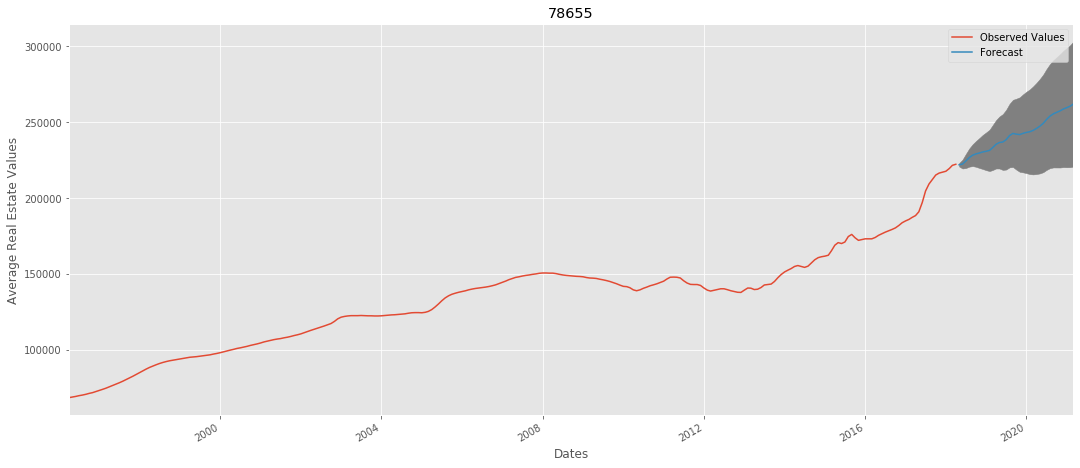

Zipcode : 78655
City :  Martindale
State :  TX
Investment($) : 222300
********
Predicted price in 3 years : 263136.0
Total Increase in 3 years : 40836.399967126374
Increase rate in 3 years (%) : 0.18
Possible range : 221084.0  -  305189.0
********
Predicted price in 5 years : 302750.0
Total Increase in 5 years : 80450.17071661464
Increase rate in 5 years (%) : 0.36
Possible range : 232197.0  -  373303.0
-----------------------------------------------------------------------------


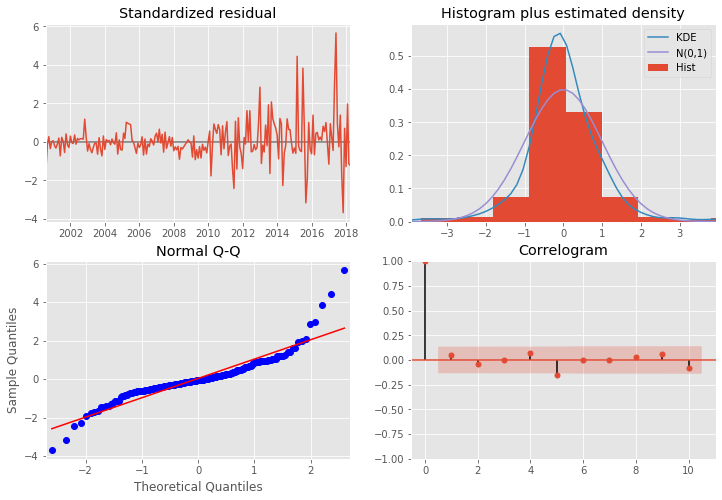

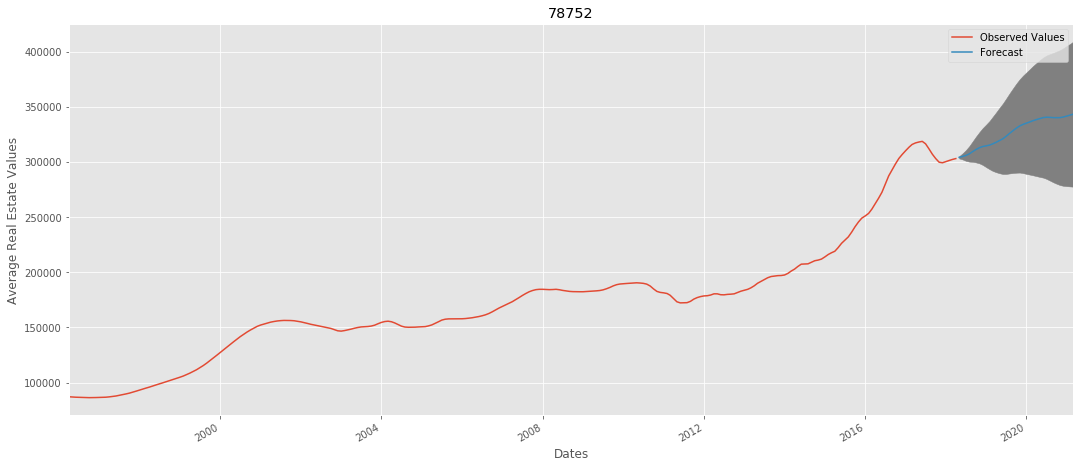

Zipcode : 78752
City :  Austin
State :  TX
Investment($) : 303100
********
Predicted price in 3 years : 344202.0
Total Increase in 3 years : 41101.91920394637
Increase rate in 3 years (%) : 0.14
Possible range : 277373.0  -  411031.0
********
Predicted price in 5 years : 365730.0
Total Increase in 5 years : 62630.009648325795
Increase rate in 5 years (%) : 0.21
Possible range : 270887.0  -  460573.0
-----------------------------------------------------------------------------


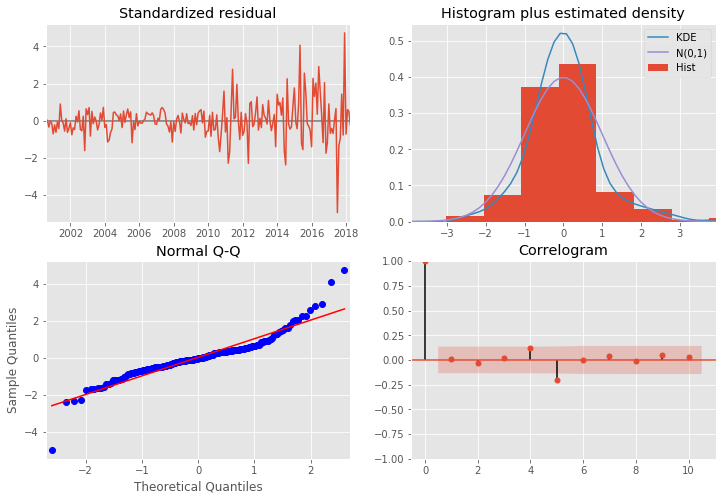

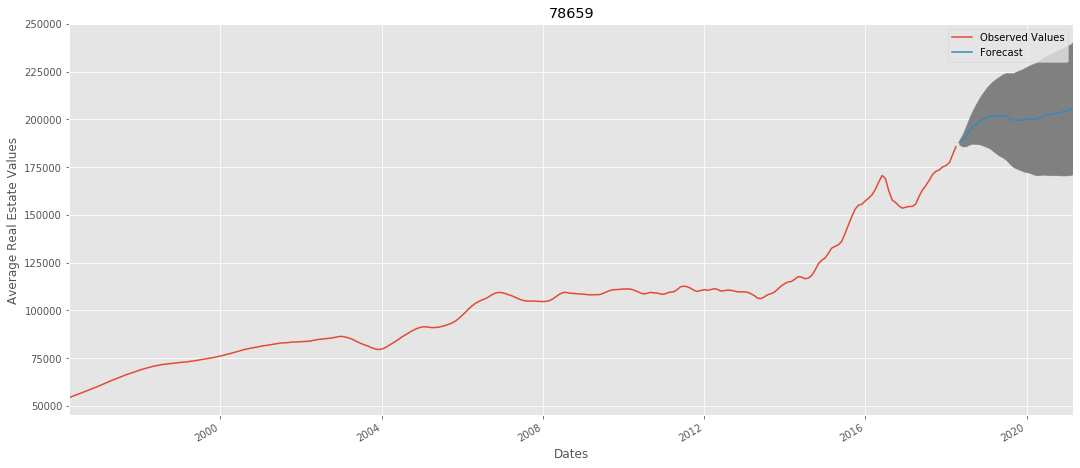

Zipcode : 78659
City :  Paige
State :  TX
Investment($) : 185700
********
Predicted price in 3 years : 207203.0
Total Increase in 3 years : 21503.445217908156
Increase rate in 3 years (%) : 0.12
Possible range : 172154.0  -  242253.0
********
Predicted price in 5 years : 220083.0
Total Increase in 5 years : 34383.12656162522
Increase rate in 5 years (%) : 0.19
Possible range : 173492.0  -  266674.0
-----------------------------------------------------------------------------


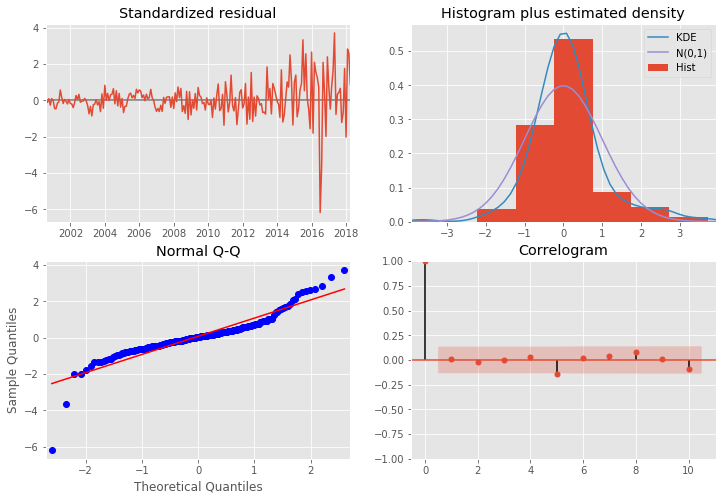

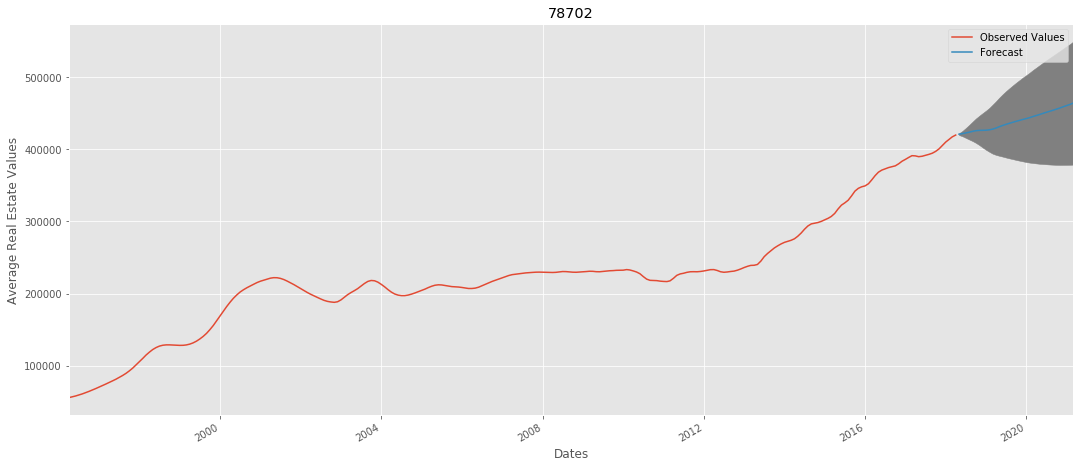

Zipcode : 78702
City :  Austin
State :  TX
Investment($) : 419800
********
Predicted price in 3 years : 465739.0
Total Increase in 3 years : 45939.44208856288
Increase rate in 3 years (%) : 0.11
Possible range : 378902.0  -  552577.0
********
Predicted price in 5 years : 500701.0
Total Increase in 5 years : 80901.41068622377
Increase rate in 5 years (%) : 0.19
Possible range : 376497.0  -  624906.0
-----------------------------------------------------------------------------


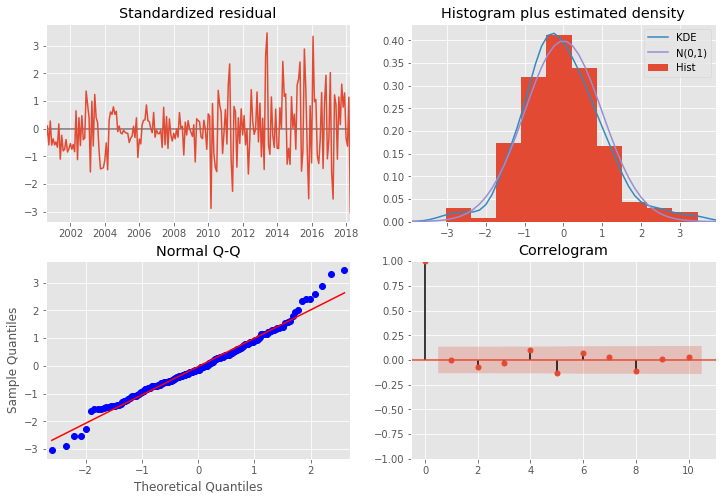

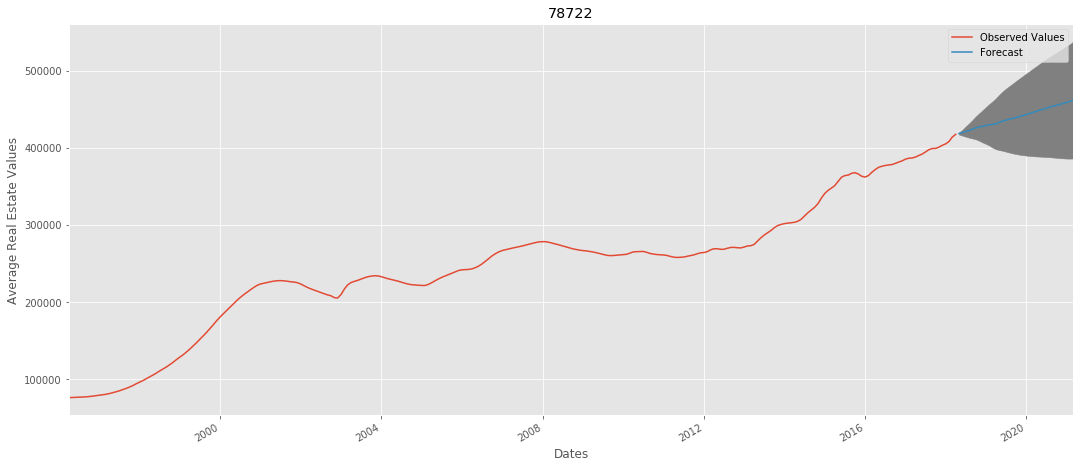

Zipcode : 78722
City :  Austin
State :  TX
Investment($) : 417500
********
Predicted price in 3 years : 463557.0
Total Increase in 3 years : 46057.336140948406
Increase rate in 3 years (%) : 0.11
Possible range : 386359.0  -  540756.0
********
Predicted price in 5 years : 493872.0
Total Increase in 5 years : 76371.5119353719
Increase rate in 5 years (%) : 0.18
Possible range : 382721.0  -  605022.0
-----------------------------------------------------------------------------


"output=arima(df_state_top10[78702], pdq_new, pdqs_new)\nprediction , pred_conf= forecasting (output, 60)\npred_conf['mean']=prediction.predicted_mean\n"

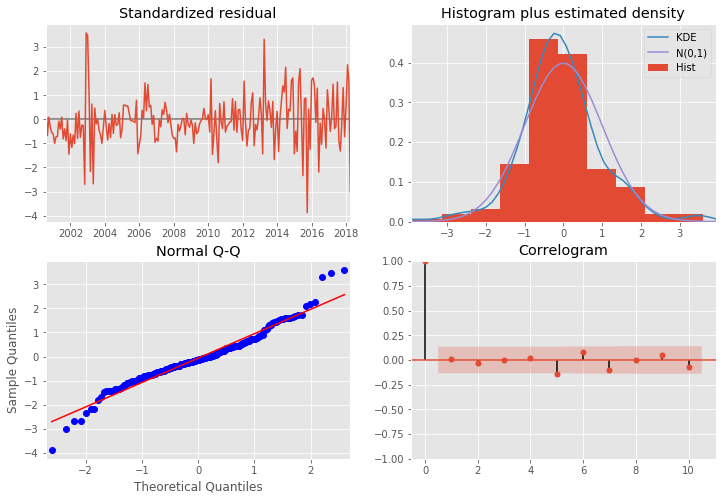

In [359]:
report_plot (zipcodes, combs, ts, df)

"""output=arima(df_state_top10[78702], pdq_new, pdqs_new)
prediction , pred_conf= forecasting (output, 60)
pred_conf['mean']=prediction.predicted_mean
"""

#Calculate increase rate in 3 - 5 years
#Plot the forecasted data along with the real data
#prediction_plot(df_state_top10[78702], output)

#### Assumptions for the model have met

From the diiognostics plot, we can see if the assumptions met to make sure the model works properly.Residuals resamble white noise and it's KDE has normal distribution with mean 0 and standard deviation of 1.Also,  the qq-plot shows that the ordered distribution of residuals mostly follows the linear trend of the samples taken from a standard normal distribution These indicate that the residuals are normally distributed. Correlogram shows that the time series residuals have low correlation with lagged versions of itself.

According to the plots above, all columns seem met the assumptions. Although KDE histogram and Q-Q plot indicates some outliers in a few zipcodes, data seem too be ok for this model mostly.  


### Creating Result Tables

In [360]:
# Add City, 
report=pred_data.iloc[:5,:]
city=[]
state=[]
metro=[]
for i in zipcodes:
    city.append(df[df.RegionName==i].City.to_string(index=False))
    state.append(df[df.RegionName==i].State.to_string(index=False))  
    metro.append(df[df.RegionName==i].Metro.to_string(index=False))  
report['State'] = state
report['City'] = city
report['Metro'] = metro

report_3_yrs= report[['Zipcode',"City", "State","Metro", 'Investment', 'forecast_3_years', "rate_3", 
                      "3_year_min", "3_year_max", "risk_range_3"]]
report_5_yrs= report[['Zipcode',"City", "State","Metro", 'Investment', 'forecast_5_years', "rate_5", 
                      "5_year_min", "5_year_max", "risk_range_5"]]


In [361]:
report_3_yrs.columns=['Zipcode',"City", "State","Metro", 'Investment', 'Price_in_3_yrs', "Growth_Rate", 
                      "Predict_min", "Predict_max", "Risk_Rate"]
report_3_yrs



,Zipcode,City,State,Metro,Investment,Price_in_3_yrs,Growth_Rate,Predict_min,Predict_max,Risk_Rate
8,78655,Martindale,TX,Austin,222300,263136.0,0.18,221084.0,305189.0,0.159815
6,78752,Austin,TX,Austin,303100,344202.0,0.14,277373.0,411031.0,0.194156
7,78659,Paige,TX,Austin,185700,207203.0,0.12,172154.0,242253.0,0.169158
0,78702,Austin,TX,Austin,419800,465739.0,0.11,378902.0,552577.0,0.186452
1,78722,Austin,TX,Austin,417500,463557.0,0.11,386359.0,540756.0,0.166536


In [400]:
report_5_yrs.columns=['Zipcode',"City", "State", "Metro",'Investment', 'Price_in_3_yrs', "Growth_Rate", 
                      "Predict_min", "Predict_max", "Risk_Rate"]
report_5_yrs



,Zipcode,City,State,Metro,Investment,Price_in_3_yrs,Growth_Rate,Predict_min,Predict_max,Risk_Rate
8,78655,Martindale,TX,Austin,222300,302750.0,0.36,232197.0,373303.0,0.233040
6,78752,Austin,TX,Austin,303100,365730.0,0.21,270887.0,460573.0,0.259325
7,78659,Paige,TX,Austin,185700,220083.0,0.19,173492.0,266674.0,0.211697
0,78702,Austin,TX,Austin,419800,500701.0,0.19,376497.0,624906.0,0.248062
1,78722,Austin,TX,Austin,417500,493872.0,0.18,382721.0,605022.0,0.225058


# Step 5: Modelling with Facebook Prophet

In [25]:
#Convert the data the format that fbprophet needs (add ds column with the dates)
df_state_top10['ds'] = df_state_top10.index
df_state_top10


RegionName,78702,78722,78648,78721,78751,78723,78752,78659,78655,78957,ds
1996-04-01,55600.0,76200.0,25000.0,69200.0,115900.0,97600.0,87200.0,54300.0,68600.0,48500.0,1996-04-01
1996-05-01,56700.0,76400.0,25200.0,68800.0,116900.0,99000.0,87000.0,55000.0,69000.0,48600.0,1996-05-01
1996-06-01,57900.0,76500.0,25500.0,68400.0,118000.0,100300.0,86800.0,55700.0,69400.0,48800.0,1996-06-01
1996-07-01,59300.0,76700.0,25800.0,68100.0,119100.0,101400.0,86700.0,56300.0,69900.0,48900.0,1996-07-01
1996-08-01,60800.0,77000.0,26100.0,67800.0,120200.0,101900.0,86500.0,57000.0,70300.0,49100.0,1996-08-01
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,405200.0,403300.0,103000.0,293000.0,434500.0,352500.0,299300.0,175100.0,217100.0,145400.0,2017-12-01
2018-01-01,410100.0,405200.0,103300.0,296300.0,436100.0,355800.0,300400.0,175800.0,217700.0,146300.0,2018-01-01
2018-02-01,413800.0,408400.0,104100.0,297800.0,437600.0,358700.0,301400.0,177300.0,219500.0,148400.0,2018-02-01
2018-03-01,417300.0,413900.0,105900.0,297200.0,441200.0,361900.0,302300.0,181400.0,221600.0,152400.0,2018-03-01


In [26]:
from fbprophet import Prophet as proph
def prophet_prediction(df, topzips):
    dscol = [x for x in df.ds]
    
    values = []
    
    for i in topzips:
        ycol = [x for x in df[i]]
        
        ts = pd.DataFrame()
        ts['ds'] = dscol
        ts['y'] = ycol
        
        Model = proph(interval_width=0.95)
        Model.fit(ts)
        
        future_dates = Model.make_future_dataframe(periods=36, freq='MS')
        forecast = Model.predict(future_dates)
        
        forecasted_data=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        
        increase_3_yrs = round(forecast['yhat'][300] - forecast['yhat'][264], 2)
        increase_rate_3 = round(increase_3_yrs / forecast['yhat'][264], 2)
                                                        
        values.append((i, df[i][-1], increase_3_yrs, increase_rate_3))
        
        
        Model.plot(forecast, uncertainty=True)
        plt.title(i)
        plt.ylabel('Real Estate Value')
        plt.xlabel('Year')
        Model.plot_components(forecast)
        plt.title(i)
        plt.ylabel('Real Estate Value')
        plt.xlabel('Yearly Trend');
        
        
       
        print("Zipcode :" , i)
        print("Investment($) :", df[i][-1] )
        print("********")
        print("Predicted price in 3 years :",round(forecast['yhat'][300] ))
        print('Increase rate in 3 years (%) :',  increase_rate_3 )
        print("-----------------------------------------------------------------------------")    
        
    return values , forecasted_data

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Zipcode : 78751
Investment($) : 444500.0
********
Predicted price in 3 years : 542233.0
Increase rate in 3 years (%) : 0.2
-----------------------------------------------------------------------------


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Zipcode : 78702
Investment($) : 419800.0
********
Predicted price in 3 years : 533840.0
Increase rate in 3 years (%) : 0.26
-----------------------------------------------------------------------------


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Zipcode : 78722
Investment($) : 417500.0
********
Predicted price in 3 years : 502665.0
Increase rate in 3 years (%) : 0.2
-----------------------------------------------------------------------------


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Zipcode : 78723
Investment($) : 364200.0
********
Predicted price in 3 years : 438552.0
Increase rate in 3 years (%) : 0.23
-----------------------------------------------------------------------------
Zipcode : 78752
Investment($) : 303100.0
********
Predicted price in 3 years : 413753.0
Increase rate in 3 years (%) : 0.28
-----------------------------------------------------------------------------


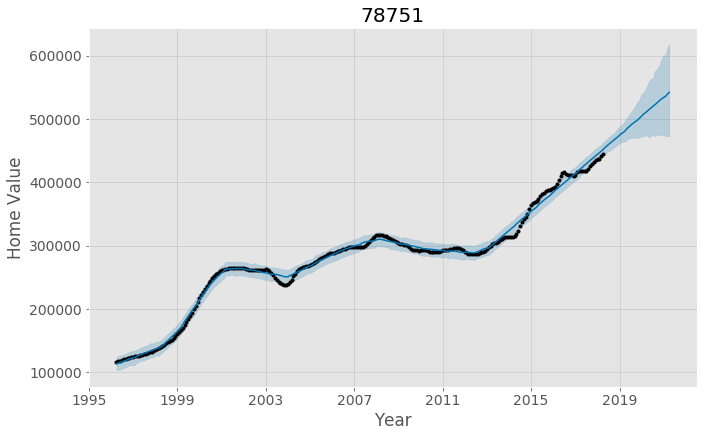

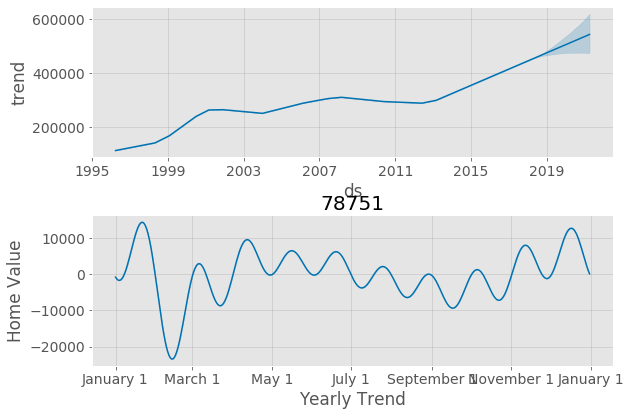

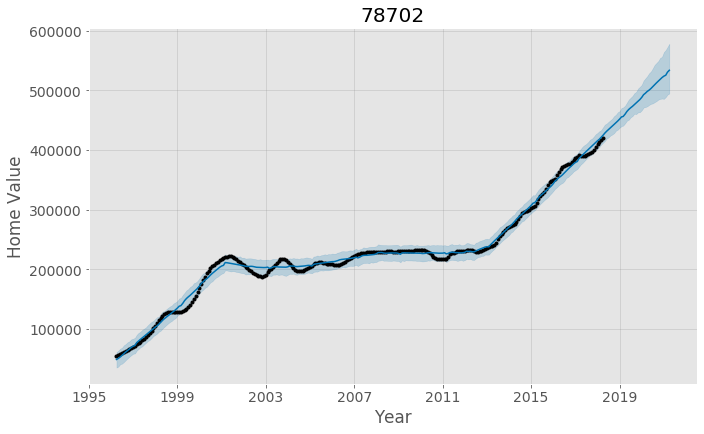

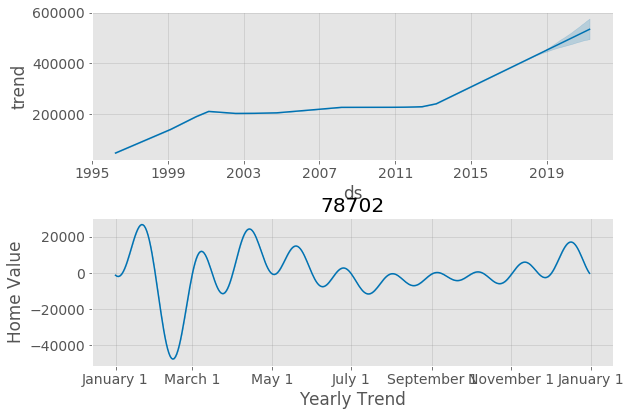

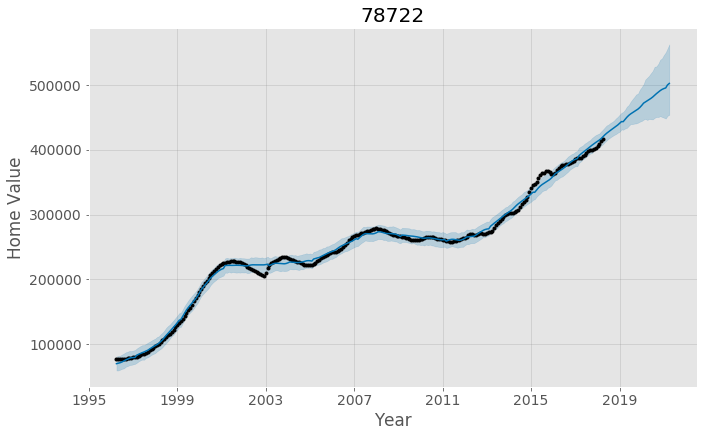

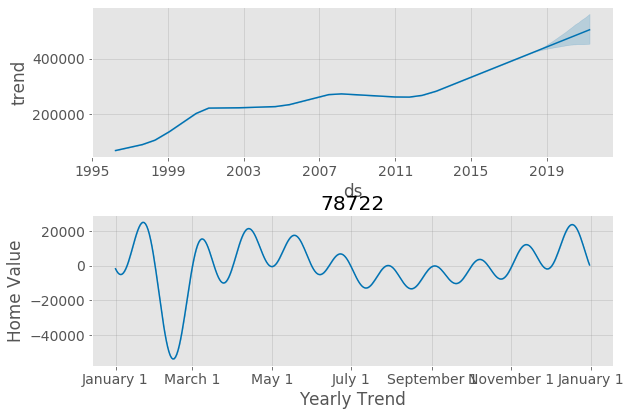

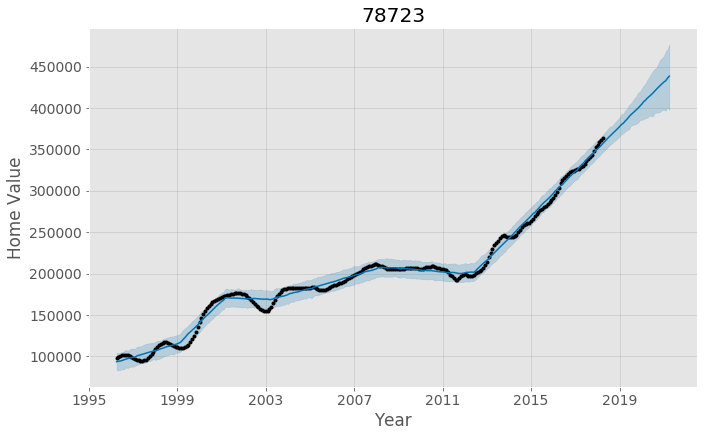

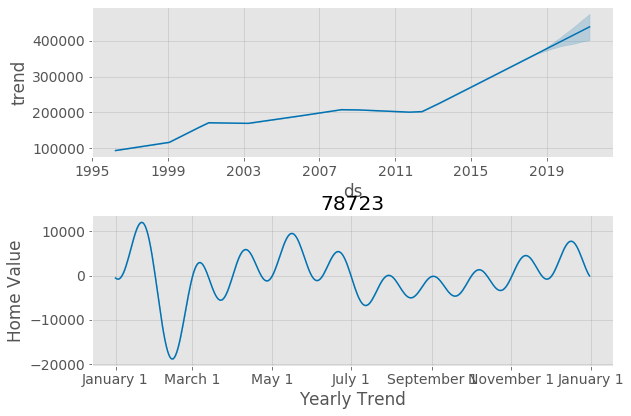

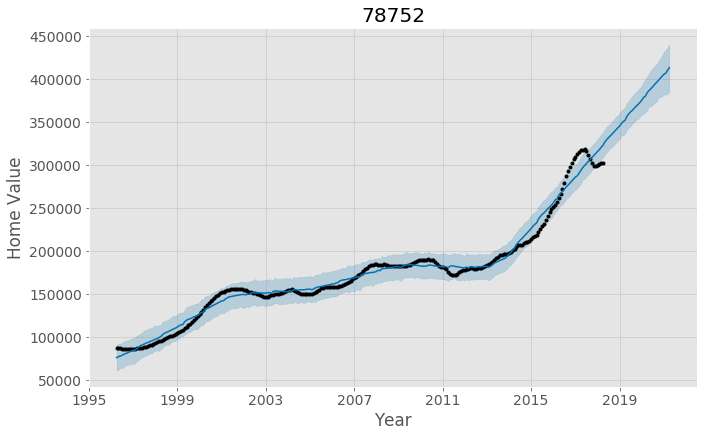

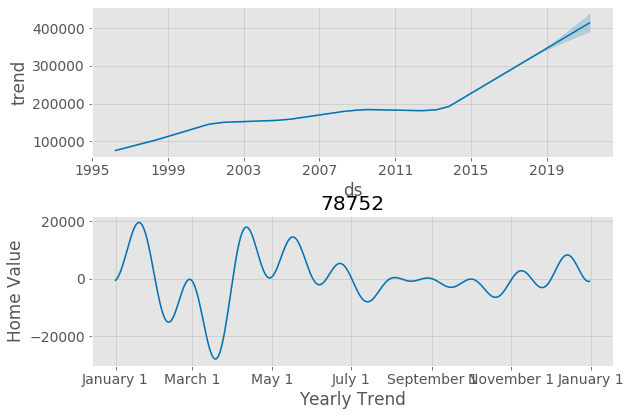

In [27]:
vals, forecasted_data = prophet_prediction(df_state_top10, zipcodes)

In [28]:
vals




[(78751, 444500.0, 90710.7, 0.2),
 (78702, 419800.0, 109144.84, 0.26),
 (78722, 417500.0, 82473.51, 0.2),
 (78723, 364200.0, 81169.43, 0.23),
 (78752, 303100.0, 90397.71, 0.28)]

Facebook Prophet Model results are slightly different than SARIMAX model result. Estmations are a little bit higher. 
I would like to test these models performence by running the models with train test split 




# Step 7: Testing the Performence of ARIMA Model

I will check the performence of ARIMA forecasting for selected Zipcode.



In [489]:
smallts=ts[78702].iloc[:80]
smallts.tail(28)

2000-08-01    205300
2000-09-01    208100
2000-10-01    210500
2000-11-01    212900
2000-12-01    215200
2001-01-01    217100
2001-02-01    218600
2001-03-01    220100
2001-04-01    221300
2001-05-01    222000
2001-06-01    221900
2001-07-01    221000
2001-08-01    219400
2001-09-01    217200
2001-10-01    214800
2001-11-01    212300
2001-12-01    209600
2002-01-01    206800
2002-02-01    204000
2002-03-01    201500
2002-04-01    199000
2002-05-01    196800
2002-06-01    194600
2002-07-01    192500
2002-08-01    190500
2002-09-01    189100
2002-10-01    188300
2002-11-01    187800
Name: 78702, dtype: int64

In [520]:
from sklearn.metrics import mean_squared_error
pdq=(3,1,1)
pdqs=(3,1,1,12)

X = ts[78702]

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history,
                                    order=pdq_new,
                                    seasonal_order=pdqs_new,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    

predicted=218001.075579, expected=218100.000000
predicted=218668.608605, expected=217900.000000
predicted=217175.202187, expected=217200.000000
predicted=216098.835299, expected=216800.000000
predicted=216856.632714, expected=216600.000000
predicted=216757.886583, expected=217600.000000
predicted=219524.251505, expected=221100.000000
predicted=226561.707745, expected=225200.000000
predicted=228889.124503, expected=227200.000000
predicted=227053.336731, expected=228100.000000
predicted=228791.360769, expected=229400.000000
predicted=231098.271492, expected=230200.000000
predicted=229950.125242, expected=230300.000000
predicted=230507.077242, expected=230200.000000
predicted=230159.248479, expected=230600.000000
predicted=231336.700294, expected=231300.000000
predicted=231998.054499, expected=232300.000000
predicted=233596.992161, expected=233100.000000
predicted=232996.162927, expected=233200.000000
predicted=233118.775527, expected=232000.000000
predicted=230449.786643, expected=230200

Test MSE: 890.554


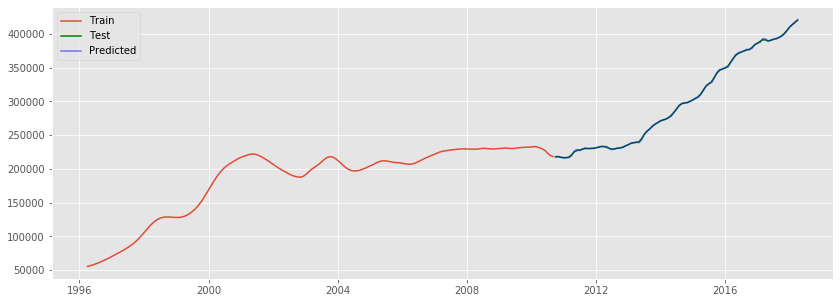

In [522]:
error = np.sqrt(mean_squared_error(test, predictions))
print('Test MSE: %.3f' % error)
plt.figure(figsize=(14,5))
plt.plot(train, label='Train')
plt.plot(test, color='green', label="Test")
plt.plot(test.index, predictions, color='blue', label="Predicted", alpha=0.5)
plt.legend()
plt.show()


In [ ]:

#prediction = model_fit.get_prediction(start=pd.to_datetime('2000-09-01'), dynamic=False) #prediction wrapper
# Get confidence intervals of forecasts
# pred_conf = prediction.conf_int()
#pred_conf



def prediction_plot(zipcode, model):
    prediction = model.get_forecast(35)
    pred_conf = prediction.conf_int()
    plt.figure(figsize=(18,8))
    plt.plot(zipcode, label='Observed Values')
    prediction.predicted_mean.plot(label='Forecast')
    
    plt.fill_between(pred_conf.index, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], color='grey')
    plt.title('{}'.format(zipcode.name))
    plt.ylabel('Average Real Estate Values')
    plt.xlabel('Dates')
    plt.legend();
    plt.show()
    
    
prediction_plot('78702', model_fit)

In [517]:
pred=pd.DataFrame
pred.index=test.index
pred[1]=[x:redictions[x], 

In [519]:
pred_conf

array([[ -3394.75720223,   3394.75720223],
       [ 73056.73465981,  79718.86708548],
       [ 67894.07491033,  74950.74130172],
       [ 55721.11391066,  62683.0671863 ],
       [ 57228.55816047,  64191.7006103 ],
       [ 56445.72954214,  63432.35906306],
       [ 59974.38614188,  66959.76079966],
       [ 61735.69525464,  68724.0462776 ],
       [ 64581.53923195,  71569.41102804],
       [ 66585.86445747,  73573.81537299],
       [ 69023.66113139,  76011.64478077],
       [ 70851.04764927,  77839.02411737],
       [ 97901.76825065, 104352.68153076],
       [ 49974.41272895,  55496.77901664],
       [ 72463.64422325,  77312.97908998],
       [ 91855.82909878,  96678.55120102],
       [ 83874.79132888,  88537.00522489],
       [ 86567.52158822,  91231.62667361],
       [ 90245.70878828,  94910.19701914],
       [ 93539.91582693,  98204.78795034],
       [ 99299.40823316, 103963.42143661],
       [103209.66174881, 107872.60081411],
       [111090.27778107, 115745.91479471],
       [111

# Step 8: Interpreting the Results

In [ ]:
report_3_yrs



In [ ]:
report_5_yrs
